In [1]:
import lightkurve as lk
%matplotlib inline

In [2]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-90', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

ConnectionError: HTTPSConnectionPool(host='mast.stsci.edu', port=443): Max retries exceeded with url: /portal/Mashup/Mashup.asmx/columnsconfig (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001FC040BED48>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [8]:
# Access the first light curve in the collection (assuming there is at least one)
first_lc = lc_collection[0]

# Get the time stamps of the light curn9 ve
time_stamps = first_lc.time

# Calculate the time differences between consecutive time stamps
time_diffs = time_stamps[1:] - time_stamps[:-1]

# Calculate the median time difference as an estimate of the sampling rate
sampling_rate = 1 / np.median(time_diffs)

# Print the estimated sampling rate
print("Estimated sampling rate:", sampling_rate, "days")


Estimated sampling rate: 48.93778095161105 1 / d days


In [7]:
# Access the first light curve in the collection (assuming there is at least one)
first_lc = lc_collection[0]

# Get the cadence of the light curve
cadence = first_lc.cadenceno  # Assuming the cadence number represents the sampling rate

# Print the cadence (sampling rate)
print("Sampling rate (cadence number):", cadence)


Sampling rate (cadence number): cadenceno 
----------
      1105
      1106
      1107
      1108
      1109
      1110
      1111
      1112
      1113
      1114
       ...
      2733
      2734
      2735
      2736
      2737
      2738
      2739
      2740
      2741
      2742
      2743
Length = 1626 rows


In [4]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr011442793,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr011442793,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr011442793,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr011442793,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr011442793,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr011442793,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr011442793,0.0
7,Kepler Quarter 09,2011,Kepler,1800,kplr011442793,0.0
8,Kepler Quarter 10,2011,Kepler,1800,kplr011442793,0.0


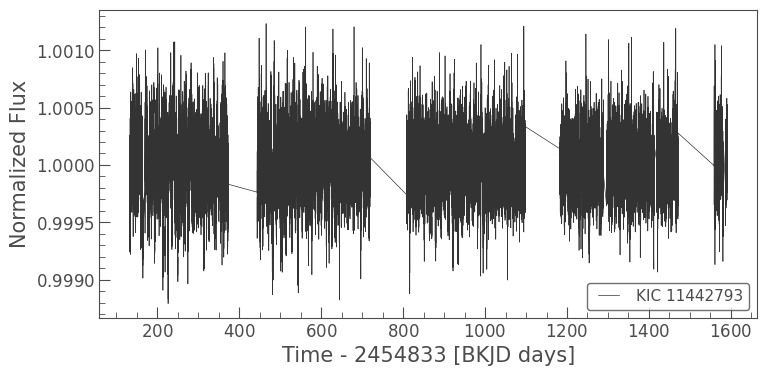

In [3]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()

lc.plot();

In [36]:
a = lc["time"][:1001]
sub = []
for i in range(1000):
    j = i + 1
    sub.append(a[i].value-a[j].value)
sub

[-0.020434303492947947,
 -0.020434203499462456,
 -0.02043410349142505,
 -0.020434203266631812,
 -0.02043430326739326,
 -0.02043410314945504,
 -0.020434203142940532,
 -0.020434303034562618,
 -0.02043420291010989,
 -0.020434102916624397,
 -0.020434202800970525,
 -0.020434302678040694,
 -0.020434102683793753,
 -0.02043420256813988,
 -0.02043430244521005,
 -0.020434102334547788,
 -0.020434202335309237,
 -0.02043420232803328,
 -0.020434202102478594,
 -0.020434202102478594,
 -0.020434201978787314,
 -0.020434201986063272,
 -0.02043420186964795,
 -0.02043420174595667,
 -0.020434101636055857,
 -0.020434301637578756,
 -0.020434201513126027,
 -0.020434101403225213,
 -0.020434201403986663,
 -0.020434301281056833,
 -0.02043410117039457,
 -0.02043420117115602,
 -0.02043430104822619,
 -0.020434200938325375,
 -0.020434100937563926,
 -0.020434200821910053,
 -0.020434300698980223,
 -0.020434100704733282,
 -0.020434200581803452,
 -0.020434300473425537,
 -0.020434100355487317,
 -0.020434200356248766,
 -0.

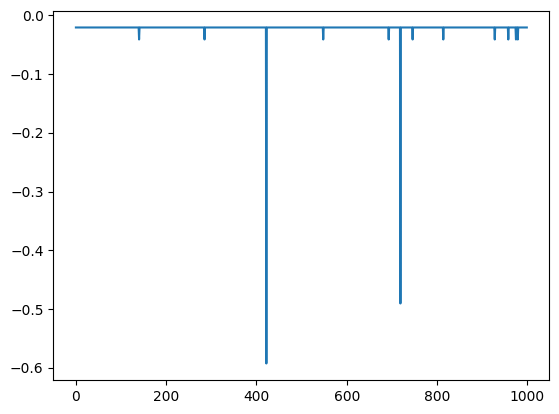

In [37]:
import matplotlib.pyplot as plt
plt.plot(sub)

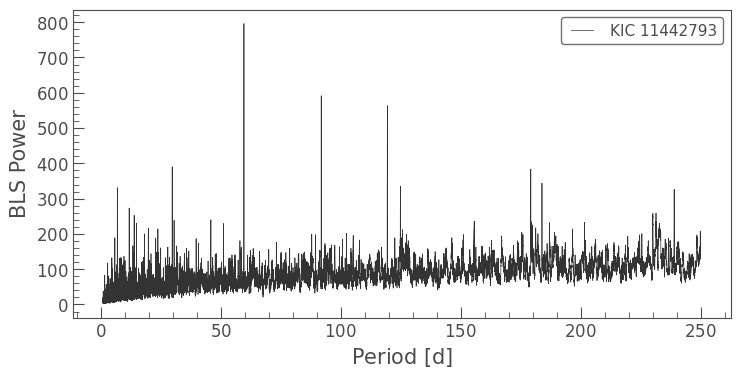

In [4]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 250, 100000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [5]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 59.73719737 d>

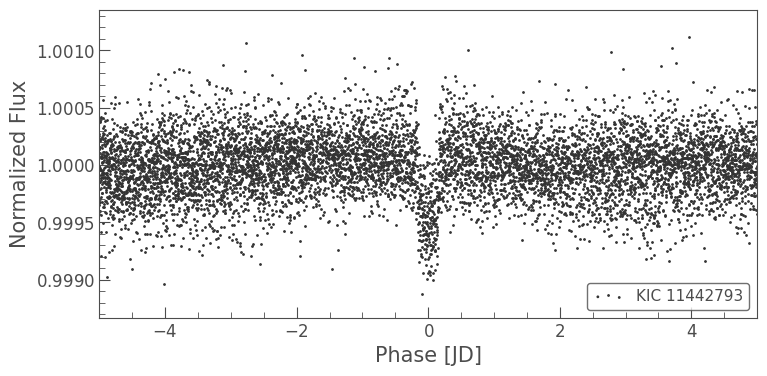

In [8]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);

In [9]:
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

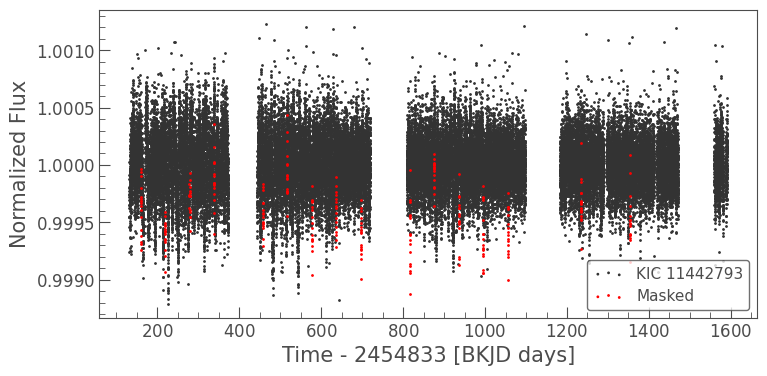

In [10]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked')

In [11]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

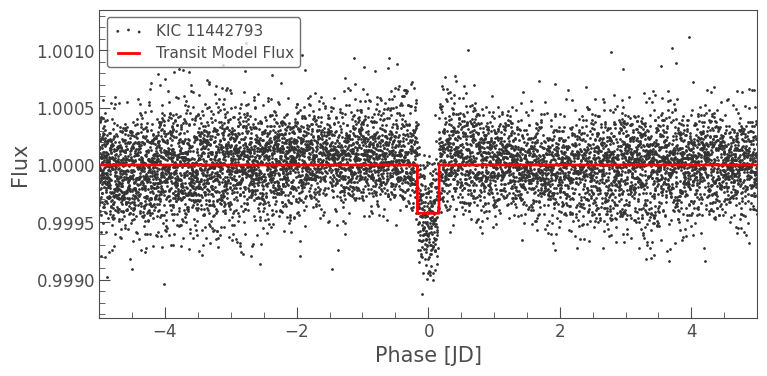

In [12]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);

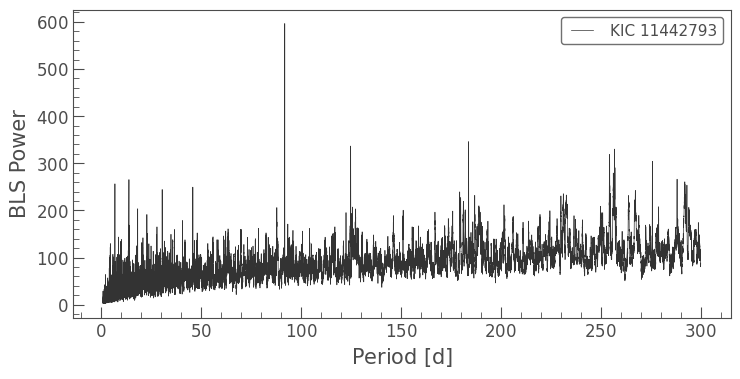

In [13]:
period = np.linspace(1, 300, 100000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot();

In [14]:
planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power

# Check the value for period
planet_c_period

<Quantity 91.93876939 d>

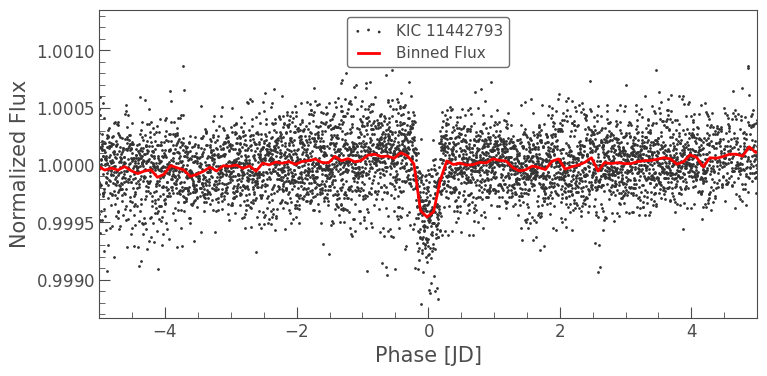

In [15]:
ax = masked_lc.fold(planet_c_period, planet_c_t0).scatter()
masked_lc.fold(planet_c_period, planet_c_t0).bin(.1).plot(ax=ax, c='r', lw=2,
                                                          label='Binned Flux')
ax.set_xlim(-5, 5);

In [16]:
planet_c_model = bls.get_transit_model(period=planet_c_period,
                                       transit_time=planet_c_t0,
                                       duration=planet_c_dur)

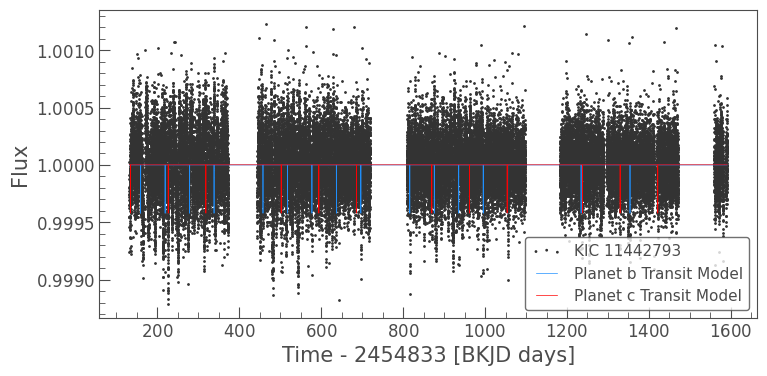

In [17]:
ax = lc.scatter();
planet_b_model.plot(ax=ax, c='dodgerblue', label='Planet b Transit Model');
planet_c_model.plot(ax=ax, c='r', label='Planet c Transit Model');

In [6]:
lc.interact_bls()

ERROR:bokeh.server.protocol_handler:error handling message
 message: Message 'PATCH-DOC' content: {'events': [{'kind': 'MessageSent', 'msg_type': 'bokeh_event', 'msg_data': {'event_name': 'panend', 'event_values': {'sx': 321.4624938964844, 'sy': 245.87500303983688, 'x': 5.910359811519584, 'y': 4.1285477236856256e-07}}}], 'references': []} 
 error: IndexError('index 1900 is out of bounds for axis 0 with size 1900')
Traceback (most recent call last):
  File "C:\Users\97155\AppData\Local\Programs\Python\Python37\lib\site-packages\bokeh\server\protocol_handler.py", line 97, in handle
    work = await handler(message, connection)
  File "C:\Users\97155\AppData\Local\Programs\Python\Python37\lib\site-packages\bokeh\server\session.py", line 95, in _needs_document_lock_wrapper
    result = func(self, *args, **kwargs)
  File "C:\Users\97155\AppData\Local\Programs\Python\Python37\lib\site-packages\bokeh\server\session.py", line 289, in _handle_patch
    message.apply_to_document(self.document, s